## Kálmán filter in 2D
GPS+IMU fusion

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sympy import Symbol, Matrix
from sympy.interactive import printing

Example

mean:           12.2149585383803
std deviation:  4.1213744424815175


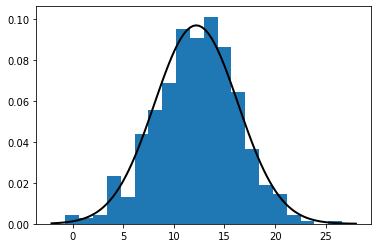

In [11]:
example = np.random.normal(12, 4, 500)
plt.hist(example, 20, density = True, label="example sensor readings")
e_mu, e_std = norm.fit(example)
print("mean:          ", e_mu)
print("std deviation: ", e_std)
xmin, xmax = plt.xlim()
e_x = np.linspace(xmin, xmax, 100)
p = norm.pdf(e_x, e_mu, e_std)
plt.plot(e_x, p, 'k', linewidth=2, label="norm")
plt.show()



In [ ]:

x = np.matrix([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
n = x.size  # States
P = np.matrix(
    [
        [10.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 10.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 10.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 10.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 10.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 10.0],
    ]
)
#print(P)

fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap("BuGn"))
plt.title("Initial Covariance Matrix $P$")
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(7))
# set the locations and labels of the yticks
plt.yticks(
    np.arange(6),
    ("$x$", "$y$", "$\dot x$", "$\dot y$", "$\ddot x$", "$\ddot y$"),
    fontsize=22,
)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(
    np.arange(6),
    ("$x$", "$y$", "$\dot x$", "$\dot y$", "$\ddot x$", "$\ddot y$"),
    fontsize=22,
)

plt.xlim([-0.5, 5.5])
plt.ylim([5.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
plt.tight_layout()

In [23]:
dt = 0.1  # Time Step between Filter Steps

A = np.matrix(
    [
        [1.0, 0.0, dt, 0.0, 1 / 2.0 * dt ** 2, 0.0],
        [0.0, 1.0, 0.0, dt, 0.0, 1 / 2.0 * dt ** 2],
        [0.0, 0.0, 1.0, 0.0, dt, 0.0],
        [0.0, 0.0, 0.0, 1.0, 0.0, dt],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    ]
)
"""
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(A, interpolation="none", cmap=plt.get_cmap("BuGn"))
plt.title("Matrix $A$")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
plt.tight_layout()
"""

'\nfig = plt.figure(figsize=(6, 6))\nim = plt.imshow(A, interpolation="none", cmap=plt.get_cmap("BuGn"))\nplt.title("Matrix $A$")\ndivider = make_axes_locatable(plt.gca())\ncax = divider.append_axes("right", "5%", pad="3%")\nplt.colorbar(im, cax=cax)\nplt.tight_layout()\n'

In [24]:
H = np.matrix(
    [
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    ]
)

In [25]:
ra = 10.0 ** 2
rp = 2.0 ** 2

R = np.matrix(
    [[ra, 0.0, 0.0, 0.0], [0.0, ra, 0.0, 0.0], [0.0, 0.0, rp, 0.0], [0.0, 0.0, 0.0, rp]]
)

In [32]:
sj = 0.1
dts = Symbol("\Delta t")
Q = (
    np.matrix(
        [
            [(dt ** 6) / 36, 0, (dt ** 5) / 12, 0, (dt ** 4) / 6, 0],
            [0, (dt ** 6) / 36, 0, (dt ** 5) / 12, 0, (dt ** 4) / 6],
            [(dt ** 5) / 12, 0, (dt ** 4) / 4, 0, (dt ** 3) / 2, 0],
            [0, (dt ** 5) / 12, 0, (dt ** 4) / 4, 0, (dt ** 3) / 2],
            [(dt ** 4) / 6, 0, (dt ** 3) / 2, 0, (dt ** 2), 0],
            [0, (dt ** 4) / 6, 0, (dt ** 3) / 2, 0, (dt ** 2)],
        ]
    )
    * sj ** 2
)
"""
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(Q, interpolation="none", cmap=plt.get_cmap("BuGn"))
plt.title("Matrix $Q$")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
plt.tight_layout()
print(Q)
"""

'\nfig = plt.figure(figsize=(6, 6))\nim = plt.imshow(Q, interpolation="none", cmap=plt.get_cmap("BuGn"))\nplt.title("Matrix $Q$")\ndivider = make_axes_locatable(plt.gca())\ncax = divider.append_axes("right", "5%", pad="3%")\nplt.colorbar(im, cax=cax)\nplt.tight_layout()\nprint(Q)\n'

Used sources:
- https://github.com/udacity/robot_pose_ekf
- https://github.com/TUMFTM
- https://github.com/cggos/imu_x_fusion
- https://github.com/PRBonn/LiDAR-MOS